#1. Find a topic & a dataset.

Link to my data: https://drive.google.com/file/d/1Wu_1V0hAF5Jej_OXq6DU5Deb-neWq4gn/view?usp=drive_link

In [1]:
print("This is an update")

This is an update


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
folder_path = '/content/drive/MyDrive/Colab Notebooks/I-7b: Mini Project I - Data [Part I]/COVID-19 Survey Student Responses.csv'

In [ ]:
import pandas as pd
df = pd.read_csv(folder_path)
df.head()

,ID,Region of residence,Age of Subject,Time spent on Online Class,Rating of Online Class experience,Medium for online class,Time spent on self study,Time spent on fitness,Time spent on sleep,Time spent on social media,Prefered social media platform,Time spent on TV,Number of meals per day,Change in your weight,Health issue during lockdown,Stress busters,Time utilized,"Do you find yourself more connected with your family, close friends , relatives ?",What you miss the most
0,R1,Delhi-NCR,21,2.0,Good,Laptop/Desktop,4.0,0.0,7.0,3.0,Linkedin,1,4,Increased,NO,Cooking,YES,YES,School/college
1,R2,Delhi-NCR,21,0.0,Excellent,Smartphone,0.0,2.0,10.0,3.0,Youtube,0,3,Decreased,NO,Scrolling through social media,YES,NO,Roaming around freely
2,R3,Delhi-NCR,20,7.0,Very poor,Laptop/Desktop,3.0,0.0,6.0,2.0,Linkedin,0,3,Remain Constant,NO,Listening to music,NO,YES,Travelling
3,R4,Delhi-NCR,20,3.0,Very poor,Smartphone,2.0,1.0,6.0,5.0,Instagram,0,3,Decreased,NO,Watching web series,NO,NO,"Friends , relatives"
4,R5,Delhi-NCR,21,3.0,Good,Laptop/Desktop,3.0,1.0,8.0,3.0,Instagram,1,4,Remain Constant,NO,Social Media,NO,NO,Travelling


This data set contains data on COVID-19 and
its impact on education, social life and mental health of students

Objective:
- The goal is to analyze student responses to understand patterns in online learning, lifestyle changes, and mental health during the lockdown, providing insights into the impact of COVID-19 on student life.

#2. Clean, Organize & Explore

##Problem 2.1.

In [ ]:
import pandas as pd

file_path = '/content/drive/MyDrive/Colab Notebooks/I-7b: Mini Project I - Data [Part I]/COVID-19 Survey Student Responses.csv'
data = pd.read_csv(file_path)
cleaned_data = data.drop(columns=['ID', 'Region of residence'])
cleaned_data.columns = [
    'Age',
    'Online_Class_Time',
    'Online_Class_Experience',
    'Online_Class_Medium',
    'Self_Study_Time',
    'Fitness_Time',
    'Sleep_Time',
    'Social_Media_Time',
    'Preferred_Social_Media',
    'TV_Time',
    'Meals_Per_Day',
    'Weight_Change',
    'Health_Issues',
    'Stress_Busters',
    'Time_Utilized',
    'Connected_With_Family',
    'What_Missed_Most'
]
cleaned_data['TV_Time'] = pd.to_numeric(cleaned_data['TV_Time'], errors='coerce')
cleaned_data['TV_Time'] = cleaned_data['TV_Time'].fillna(cleaned_data['TV_Time'].median())
cleaned_data = cleaned_data.fillna(method='ffill')
cleaned_data = cleaned_data.astype({
    'Age': 'int',
    'Online_Class_Time': 'float',
    'Self_Study_Time': 'float',
    'Fitness_Time': 'float',
    'Sleep_Time': 'float',
    'Social_Media_Time': 'float',
    'Meals_Per_Day': 'int',
    'TV_Time': 'int'
})
cleaned_data.head()
# here I used LLM to clean up the data and rename some of the titles that may have been confusing.


<ipython-input-4-786294c15368>:27: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  cleaned_data = cleaned_data.fillna(method='ffill')


,Age,Online_Class_Time,Online_Class_Experience,Online_Class_Medium,Self_Study_Time,Fitness_Time,Sleep_Time,Social_Media_Time,Preferred_Social_Media,TV_Time,Meals_Per_Day,Weight_Change,Health_Issues,Stress_Busters,Time_Utilized,Connected_With_Family,What_Missed_Most
0,21,2.0,Good,Laptop/Desktop,4.0,0.0,7.0,3.0,Linkedin,1,4,Increased,NO,Cooking,YES,YES,School/college
1,21,0.0,Excellent,Smartphone,0.0,2.0,10.0,3.0,Youtube,0,3,Decreased,NO,Scrolling through social media,YES,NO,Roaming around freely
2,20,7.0,Very poor,Laptop/Desktop,3.0,0.0,6.0,2.0,Linkedin,0,3,Remain Constant,NO,Listening to music,NO,YES,Travelling
3,20,3.0,Very poor,Smartphone,2.0,1.0,6.0,5.0,Instagram,0,3,Decreased,NO,Watching web series,NO,NO,"Friends , relatives"
4,21,3.0,Good,Laptop/Desktop,3.0,1.0,8.0,3.0,Instagram,1,4,Remain Constant,NO,Social Media,NO,NO,Travelling


##Problem 2.2.

In [ ]:
quantitative_columns = ['Age', 'Online_Class_Time', 'Self_Study_Time', 'Fitness_Time', 'Sleep_Time', 'Social_Media_Time', 'TV_Time', 'Meals_Per_Day']
mean_values = cleaned_data[quantitative_columns].mean()
median_values = cleaned_data[quantitative_columns].median()
std_dev_values = cleaned_data[quantitative_columns].std()

mode_values = cleaned_data[quantitative_columns].mode().iloc[0]

summary_stats = pd.DataFrame({
    'Mean': mean_values,
    'Median': median_values,
    'Mode': mode_values,
    'Standard Deviation': std_dev_values
})

print(summary_stats)
summary_stats.to_csv('summary_statistics.csv', index=False)
# I used LLM to calculate the mean of the CSV and display the data in a table manner.

                        Mean  Median  Mode  Standard Deviation
Age                20.165821    20.0  20.0            5.516467
Online_Class_Time   3.208841     3.0   4.0            2.101756
Self_Study_Time     2.911591     2.0   2.0            2.140590
Fitness_Time        0.765821     1.0   1.0            0.724451
Sleep_Time          7.871235     8.0   8.0            1.615762
Social_Media_Time   2.365694     2.0   1.0            1.767336
TV_Time             0.978849     1.0   0.0            1.280503
Meals_Per_Day       2.917936     3.0   3.0            0.828698


In [ ]:
qualitative_columns = [
    'Online_Class_Experience', 'Online_Class_Medium', 'Preferred_Social_Media',
    'Weight_Change', 'Health_Issues', 'Stress_Busters', 'Time_Utilized',
    'Connected_With_Family', 'What_Missed_Most'
]

for col in qualitative_columns:
    print(f"\nFrequency counts for '{col}':")
    print(cleaned_data[col].value_counts().to_string())
    print("-" * 40)
print("\nFrequency counts for 'Meals_Per_Day' (Quantitative Discrete):")
print(cleaned_data['Meals_Per_Day'].value_counts().to_string())

#Here, I used a for loop to make count the frequency of the both quantitative and qualitative data


Frequency counts for 'Online_Class_Experience':
Online_Class_Experience
Very poor    422
Average      396
Good         236
Excellent     98
Poor          30
----------------------------------------

Frequency counts for 'Online_Class_Medium':
Online_Class_Medium
Smartphone                      573
Laptop/Desktop                  562
Tablet                           37
Any Gadget                        5
Smartphone or Laptop/Desktop      5
----------------------------------------

Frequency counts for 'Preferred_Social_Media':
Preferred_Social_Media
Instagram    358
Whatsapp     339
Youtube      320
Linkedin      63
Facebook      52
Twitter       28
Snapchat       8
Reddit         5
Telegram       3
Omegle         1
Elyment        1
None           1
Quora          1
Talklife       1
WhatsApp       1
----------------------------------------

Frequency counts for 'Weight_Change':
Weight_Change
Remain Constant    535
Increased          438
Decreased          209
--------------------------

##Problem 2.3.

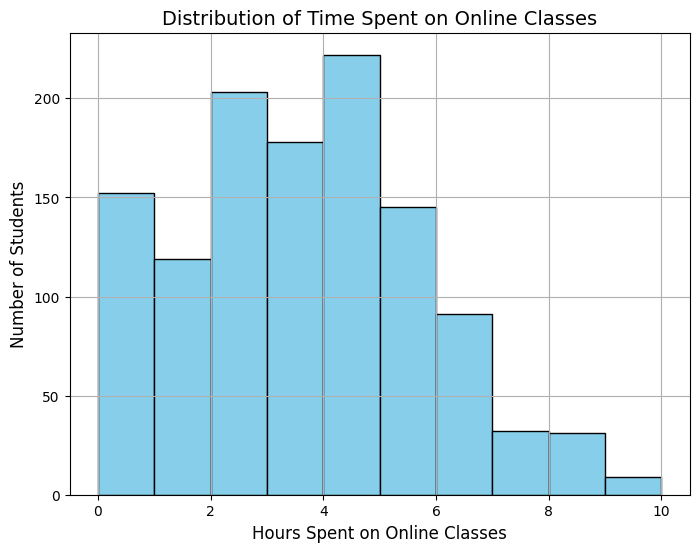

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.hist(cleaned_data['Online_Class_Time'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of Time Spent on Online Classes', fontsize=14)
plt.xlabel('Hours Spent on Online Classes', fontsize=12)
plt.ylabel('Number of Students', fontsize=12)
plt.grid(True)
plt.show()
# LMM was used to make a histogram of the time spent on online classes

[Fig 1]Histogram of Time Spent on Online Classes

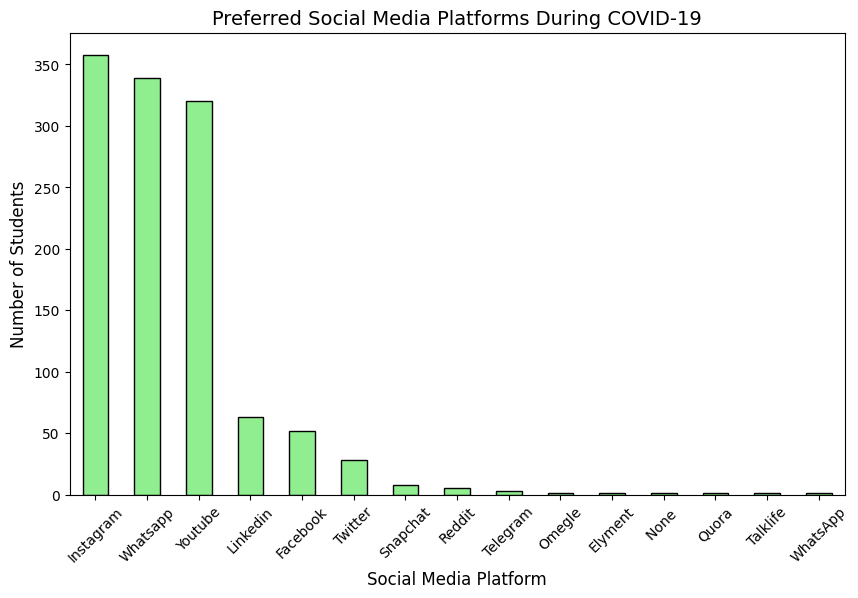

In [ ]:
plt.figure(figsize=(10, 6))
cleaned_data['Preferred_Social_Media'].value_counts().plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Preferred Social Media Platforms During COVID-19', fontsize=14)
plt.xlabel('Social Media Platform', fontsize=12)
plt.ylabel('Number of Students', fontsize=12)
plt.xticks(rotation=45)
plt.show()

#LLM was used to create a bar chart of preferred socail media platforms

[Fig 2]Bar Chart of Preferred Social Media Platforms

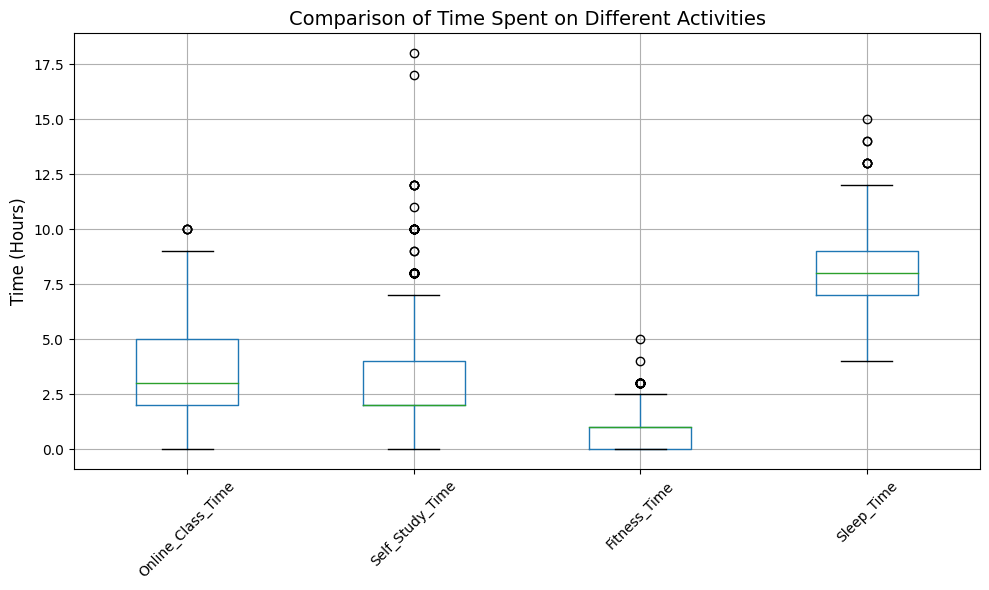

In [ ]:
plt.figure(figsize=(10, 6))
cleaned_data[['Online_Class_Time', 'Self_Study_Time', 'Fitness_Time', 'Sleep_Time']].boxplot()
plt.title('Comparison of Time Spent on Different Activities', fontsize=14)
plt.ylabel('Time (Hours)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#LLM was used to create the Box Plot to compare time spent on different activities

[Fig 3]Box Plot to compare time spent on different activities

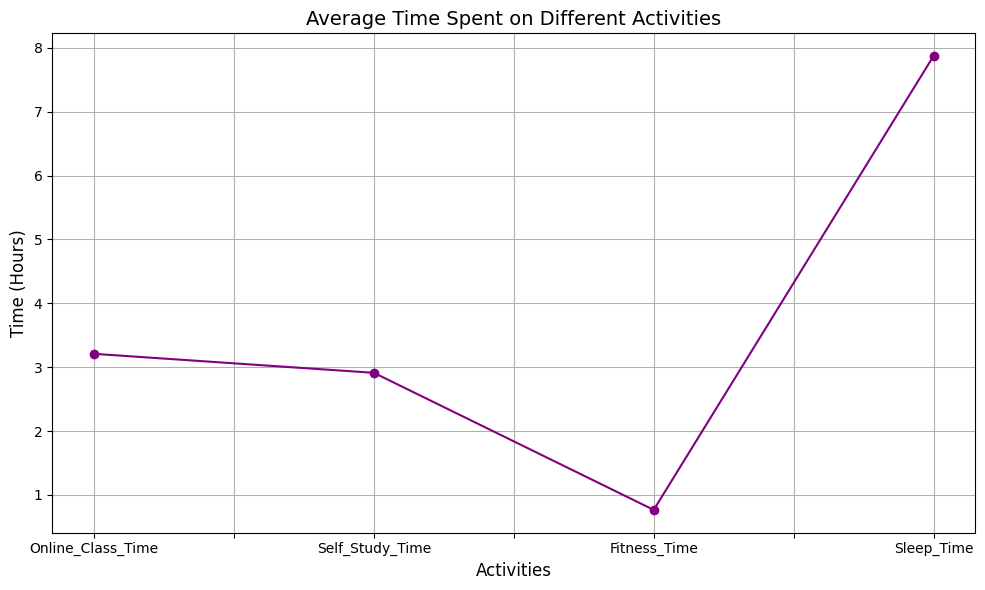

In [ ]:
mean_time_spent = cleaned_data[['Online_Class_Time', 'Self_Study_Time', 'Fitness_Time', 'Sleep_Time']].mean()

plt.figure(figsize=(10, 6))
mean_time_spent.plot(kind='line', marker='o', color='purple')
plt.title('Average Time Spent on Different Activities', fontsize=14)
plt.xlabel('Activities', fontsize=12)
plt.ylabel('Time (Hours)', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

#Used LLM to create an additional line graph of the mean time spent on activities in the line chart.

[Fig 3]The mean time spent on activities in a line chart

## Problem 2.4.

- The dataset provides insights into student behaviors, activities, and experiences during the COVID-19 lockdown, focusing on areas like online class time, self-study, fitness, social media usage, and stress management. Many students spending around 2-3 hours per day on online classes, indicating that while some students are engaged for long durations, others are less involved. The self-study time also varies, with a large portion of students dedicating around 2-3 hours daily.

- The distribution of sleep time is fairly concentrated around the 7-8 hour range, which indicates that most students were getting adequate sleep, despite the disruptions of the pandemic. On the other hand, fitness time is relatively low, with many students spending less than 1 hour per day on fitness, which may reflect challenges in maintaining physical activity during lockdowns, which was actually surprising to find since I thought that there would be an increase of fitness activity due to the increase of time with the pandemic.

- Social media usage is widespread, with students spending large amounts of time online, as platforms like Instagram, YouTube, and LinkedIn show high engagement levels. This suggests that students were turning to social media both for entertainment and perhaps to maintain connections. In terms of stress management, activities like cooking, listening to music, and watching web series were common, implying that students found accessible ways to cope with the stress of lockdown. Overall, the data reflects a balance between academic involvement, personal well-being, and social connectivity during a period of global pandemic.


##3. Inference
###Objective 1: Investigate whether there is a relationship between the amount of time students spend on social media and the average time they spend in online classes during the COVID-19 lockdown.



- H01:The time spent on social media does not affect the average time spent on online classes during the COVID-19 lockdown.

- Type I Error: Concluding that time spent on social media affects the time spent on online classes when, in reality, no such relationship exists. This could lead to misguided attempts to reduce social media usage among students to boost their online learning time.

- Type II Error: Failing to detect a true relationship between social media usage and time spent on online classes, potentially overlooking the impact of social media habits on students' learning behaviors.

- Mann-Whitney U-Test is suitable
- Statistical Significance Level -5%
- Study Power 80%


In [ ]:
import pandas as pd
import numpy as np

file_path = '/content/drive/MyDrive/Colab Notebooks/I-7b: Mini Project I - Data [Part I]/COVID-19 Survey Student Responses.csv'
data = pd.read_csv(file_path)

print(data.columns)

median_social_media_time = data['Time spent on social media'].median()

social_media_high = data[data['Time spent on social media'] >= median_social_media_time]['Time spent on Online Class']
social_media_low = data[data['Time spent on social media'] < median_social_media_time]['Time spent on Online Class']

social_media_high = social_media_high.dropna().to_numpy()
social_media_low = social_media_low.dropna().to_numpy()

print(f"Number of students in high social media usage group: {len(social_media_high)}")
print(f"Number of students in low social media usage group: {len(social_media_low)}")

print("Sample data for high social media usage group (Online Class time):", social_media_high[:5])
print("Sample data for low social media usage group (Online Class time):", social_media_low[:5])
# I needed to calculate my high and lows of time spent on online class, I used chatGPT4 to help me assemble this code snippet, I need this in order to calculate the MDE in the next steps.


Index(['ID', 'Region of residence', 'Age of Subject',
       'Time spent on Online Class', 'Rating of Online Class experience',
       'Medium for online class', 'Time spent on self study',
       'Time spent on fitness', 'Time spent on sleep',
       'Time spent on social media', 'Prefered social media platform',
       'Time spent on TV', 'Number of meals per day', 'Change in your weight',
       'Health issue during lockdown', 'Stress busters', 'Time utilized',
       'Do you find yourself more connected with your family, close friends , relatives  ?',
       'What you miss the most'],
      dtype='object')
Number of students in high social media usage group: 741
Number of students in low social media usage group: 441
Sample data for high social media usage group (Online Class time): [2. 0. 7. 3. 3.]
Sample data for low social media usage group (Online Class time): [0. 1. 1. 4. 4.]


In [ ]:
from statsmodels.stats.power import TTestIndPower
import numpy as np

power_analysis = TTestIndPower()

alpha = 0.05
power = 0.80

social_media_high = np.array([2.0, 0.0, 7.0, 3.0, 3.0])
social_media_low = np.array([0.0, 1.0, 1.0, 4.0, 4.0])
std_dev_combined = np.sqrt(
    ((len(social_media_high) - 1) * np.std(social_media_high, ddof=1) ** 2 +
     (len(social_media_low) - 1) * np.std(social_media_low, ddof=1) ** 2) /
    (len(social_media_high) + len(social_media_low) - 2)
)

n_per_group = min(len(social_media_high), len(social_media_low))

effect_size = power_analysis.solve_power(
    effect_size=None, nobs1=n_per_group, alpha=alpha, power=power, ratio=1.0, alternative='two-sided'
)

mde_mann_whitney = effect_size * std_dev_combined

print(f"The Minimum Detectable Effect (MDE): {mde_mann_whitney:.2f} hours")
# I used my results I gathered from the code before to get get the MDE, chatGPT helped me construct this code.

The Minimum Detectable Effect (MDE): 4.53 hours



### Objective 2: Investigate whether there is a difference in the time spent on fitness activities between students who reported changes in weight (increase or decrease) and those who did not during the COVID-19 lockdown.


- H02: The mean time spent on fitness activities is the same for students who reported a change in weight (increase or decrease) and those who reported no change in weight during the COVID-19 lockdown.

- Type I Error: Concluding that there is a difference in fitness time between students with different weight changes when, in fact, no such difference exists. This could lead to false claims about the role of exercise in weight management, potentially overlooking other factors like diet.

- Type II Error: Failing to detect a true difference in fitness time between students who experienced weight changes and those who did not, missing important insights into the role of physical activity in managing weight during the lockdown.

- The Mann-Whitney U test is ideal.
- Statistical Significance Level: 0.05 (5%)
- Study Power: 0.8 (80%)



In [ ]:
import pandas as pd

file_path = '/content/drive/MyDrive/Colab Notebooks/I-7b: Mini Project I - Data [Part I]/COVID-19 Survey Student Responses.csv'
data = pd.read_csv(file_path)

fitness_time_weight_change = data[
    data['Change in your weight'].str.lower().str.contains('increase|decrease', na=False)
]['Time spent on fitness'].dropna()

fitness_time_no_weight_change = data[
    data['Change in your weight'].str.lower().str.contains('constant|no change|remained', na=False)
]['Time spent on fitness'].dropna()

mean_weight_change = fitness_time_weight_change.mean()
mean_no_weight_change = fitness_time_no_weight_change.mean()
std_weight_change = fitness_time_weight_change.std()
std_no_weight_change = fitness_time_no_weight_change.std()
n_weight_change = len(fitness_time_weight_change)
n_no_weight_change = len(fitness_time_no_weight_change)

mean_weight_change, mean_no_weight_change, std_weight_change, std_no_weight_change, n_weight_change, n_no_weight_change
#I used chatGPT to get these data to help me calculate the MDE

(0.7666151468315301,
 0.7648598130841122,
 0.7572036783338378,
 0.6834512063577582,
 647,
 535)

In [ ]:
from statsmodels.stats.power import TTestIndPower
import numpy as np

power_analysis = TTestIndPower()

alpha = 0.05
power = 0.80


mean_weight_change = fitness_time_weight_change.mean()
mean_no_weight_change = fitness_time_no_weight_change.mean()
std_weight_change = fitness_time_weight_change.std()
std_no_weight_change = fitness_time_no_weight_change.std()
n_weight_change = len(fitness_time_weight_change)
n_no_weight_change = len(fitness_time_no_weight_change)

std_dev_combined = np.sqrt(
    ((n_weight_change - 1) * std_weight_change ** 2 +
     (n_no_weight_change - 1) * std_no_weight_change ** 2) /
    (n_weight_change + n_no_weight_change - 2)
)

n_per_group = min(n_weight_change, n_no_weight_change)

effect_size = power_analysis.solve_power(
    effect_size=None, nobs1=n_per_group, alpha=alpha, power=power, ratio=1.0, alternative='two-sided'
)

mde_mann_whitney = effect_size * std_dev_combined

mde_mann_whitney

#This was done with chatGPT4, I used it in combined efforts with the previous code to test for MDE

0.12425862547247928


The Minimum Detectable Effect (MDE) is approximately 0.12 hours (about 7.5 minutes).



## Problem: 3.2

In [ ]:
from scipy.stats import shapiro
import pandas as pd

file_path = '/content/drive/MyDrive/Colab Notebooks/I-7b: Mini Project I - Data [Part I]/COVID-19 Survey Student Responses.csv'
data = pd.read_csv(file_path)

social_media_time = data['Time spent on social media'].dropna()
online_class_time = data['Time spent on Online Class'].dropna()

shapiro_social_media = shapiro(social_media_time)
shapiro_online_class = shapiro(online_class_time)

print(f"Shapiro-Wilk Test for Social Media Time: Statistic={shapiro_social_media.statistic}, p-value={shapiro_social_media.pvalue}")
print(f"Shapiro-Wilk Test for Online Class Time: Statistic={shapiro_online_class.statistic}, p-value={shapiro_online_class.pvalue}")

#This was done with chatGPT4, it helpe me complie the code, used to run the Shapiro Wilk test

Shapiro-Wilk Test for Social Media Time: Statistic=0.8336603788416131, p-value=2.240321327409918e-33
Shapiro-Wilk Test for Online Class Time: Statistic=0.9575640935257611, p-value=4.953032679365918e-18


Do not follow a normal distribution

In [ ]:
from scipy.stats import shapiro
import pandas as pd

file_path = '/content/drive/MyDrive/Colab Notebooks/I-7b: Mini Project I - Data [Part I]/COVID-19 Survey Student Responses.csv'
data = pd.read_csv(file_path)

fitness_time_weight_change = data[
    data['Change in your weight'].str.lower().str.contains('increase|decrease', na=False)
]['Time spent on fitness'].dropna()

fitness_time_no_weight_change = data[
    data['Change in your weight'].str.lower().str.contains('constant|no change|remained', na=False)
]['Time spent on fitness'].dropna()

shapiro_fitness_weight_change = shapiro(fitness_time_weight_change)
shapiro_fitness_no_weight_change = shapiro(fitness_time_no_weight_change)

print(f"Shapiro-Wilk Test for Fitness Time (Weight Change): Statistic={shapiro_fitness_weight_change.statistic}, p-value={shapiro_fitness_weight_change.pvalue}")
print(f"Shapiro-Wilk Test for Fitness Time (No Weight Change): Statistic={shapiro_fitness_no_weight_change.statistic}, p-value={shapiro_fitness_no_weight_change.pvalue}")

#This was done with chatGPT4, it helpe me complie the code, I used it to run the Shapiro Wilk test

Shapiro-Wilk Test for Fitness Time (Weight Change): Statistic=0.8079892990201303, p-value=5.062929302382928e-27
Shapiro-Wilk Test for Fitness Time (No Weight Change): Statistic=0.7955570968436085, p-value=2.132827393163172e-25


Do not follow a normal distribution

```
# This is formatted as code
```



##Problem 3.3:

In [ ]:
from scipy.stats import mannwhitneyu
import pandas as pd

file_path = '/content/drive/MyDrive/Colab Notebooks/I-7b: Mini Project I - Data [Part I]/COVID-19 Survey Student Responses.csv'
data = pd.read_csv(file_path)

median_social_media_time = data['Time spent on social media'].median()

social_media_high = data[data['Time spent on social media'] >= median_social_media_time]['Time spent on Online Class'].dropna()

social_media_low = data[data['Time spent on social media'] < median_social_media_time]['Time spent on Online Class'].dropna()

mannwhitney_social_media = mannwhitneyu(social_media_high, social_media_low, alternative='two-sided')

print(f"Mann-Whitney U Test for Social Media Time vs. Online Class Time: Statistic={mannwhitney_social_media.statistic}, p-value={mannwhitney_social_media.pvalue}")
#This was done with chatGPT4, it helpe me complie the code, I used it to run the Mann-whitney U test.

Mann-Whitney U Test for Social Media Time vs. Online Class Time: Statistic=140442.0, p-value=4.4470348533539716e-05


Since the p-value is less than 0.05, we reject the null hypothesis. The test has found enough evidence to conclude that the time students spend on online classes differs based on how much time they spend on social media.

In [ ]:
import pandas as pd
from scipy.stats import shapiro, mannwhitneyu

file_path = '/content/drive/MyDrive/Colab Notebooks/I-7b: Mini Project I - Data [Part I]/COVID-19 Survey Student Responses.csv'
data = pd.read_csv(file_path)

fitness_time_weight_change = data[
    data['Change in your weight'].str.lower().str.contains('increase|decrease', na=False)
]['Time spent on fitness'].dropna()

fitness_time_no_weight_change = data[
    data['Change in your weight'].str.lower().str.contains('constant|no change|remained', na=False)
]['Time spent on fitness'].dropna()

shapiro_fitness_weight_change = shapiro(fitness_time_weight_change)
shapiro_fitness_no_weight_change = shapiro(fitness_time_no_weight_change)

print(f"Shapiro-Wilk Test for Fitness Time (Weight Change): Statistic={shapiro_fitness_weight_change.statistic}, p-value={shapiro_fitness_weight_change.pvalue}")
print(f"Shapiro-Wilk Test for Fitness Time (No Weight Change): Statistic={shapiro_fitness_no_weight_change.statistic}, p-value={shapiro_fitness_no_weight_change.pvalue}")

mannwhitney_fitness_weight = mannwhitneyu(fitness_time_weight_change, fitness_time_no_weight_change, alternative='two-sided')

print(f"Mann-Whitney U Test for Fitness Time vs. Weight Change: Statistic={mannwhitney_fitness_weight.statistic}, p-value={mannwhitney_fitness_weight.pvalue}")

#This was done with chatGPT4, it helpe me complie the code, I used it to run the Mann-whitney U test.

Shapiro-Wilk Test for Fitness Time (Weight Change): Statistic=0.8079892990201303, p-value=5.062929302382928e-27
Shapiro-Wilk Test for Fitness Time (No Weight Change): Statistic=0.7955570968436085, p-value=2.132827393163172e-25
Mann-Whitney U Test for Fitness Time vs. Weight Change: Statistic=169992.5, p-value=0.5682767092745807


The p-value is greater than 0.05, indicating that there is no statistically significant difference in time spent on fitness activities between students who reported a change in weight and those who did not. In other words, the data suggests that time spent on fitness does not vary significantly between the two groups.

##Problem 3.4:

### Interpretation in “Data Science” Speak:

The null hypotheses for both tests state that there is no difference between the groups being compared. For the test investigating social media usage and online class time, the null hypothesis assumes that there is no difference in the time spent on online classes between students with high and low social media usage. For the test examining fitness time and weight change, the null hypothesis assumes that there is no difference in the time spent on fitness activities between students who reported a weight change and those whose weight remained constant.

The results of the Mann-Whitney U test for social media usage and online class time yielded a p-value of 4.45e-05, which is significantly below the common threshold of 0.05. This led to the rejection of the null hypothesis, indicating that there is a statistically significant difference in time spent on online classes between high and low social media users. Conversely, the test for fitness time and weight change produced a p-value of 0.568, which is much higher than 0.05, leading to the failure to reject the null hypothesis. This means that we do not have sufficient evidence to conclude that there is a significant difference in the time spent on fitness activities between students who reported weight changes and those whose weight remained constant.

The findings suggest that social media usage does indeed have a measurable effect on the time students dedicate to online classes, but differences in fitness time between weight change groups may be due to chance. In terms of risks, a Type I error could occur if we incorrectly reject a true null hypothesis. For the social media test, this would mean falsely concluding that social media usage affects online class time when it does not. A Type II error could occur if we fail to detect a true difference when one exists, such as missing out on a genuine effect of fitness time on weight change, even though the p-value suggests no significant difference.


### Interpretation in “Innovation” Speak:

The test results offer valuable insights into student behaviors during the COVID-19 lockdown. The analysis of social media usage and time spent in online classes reveals that students with different social media habits allocate their time for online learning in distinct ways. Specifically, students with higher social media usage tend to spend significantly different amounts of time on online classes compared to those with lower usage, possibly due to distractions or alternative uses of digital platforms.

In contrast, the findings regarding fitness time and weight change do not indicate a significant difference in behavior. This suggests that the time students spend on physical activities may not be a determining factor in their self-reported changes in weight during the lockdown. Further research could explore other factors influencing weight changes, such as diet or stress, to provide a more holistic understanding of the factors at play. The difference in results between these two tests underscores the complexity of behaviors during the lockdown and suggests areas for further investigation.

##4. Dashboard From Tableau

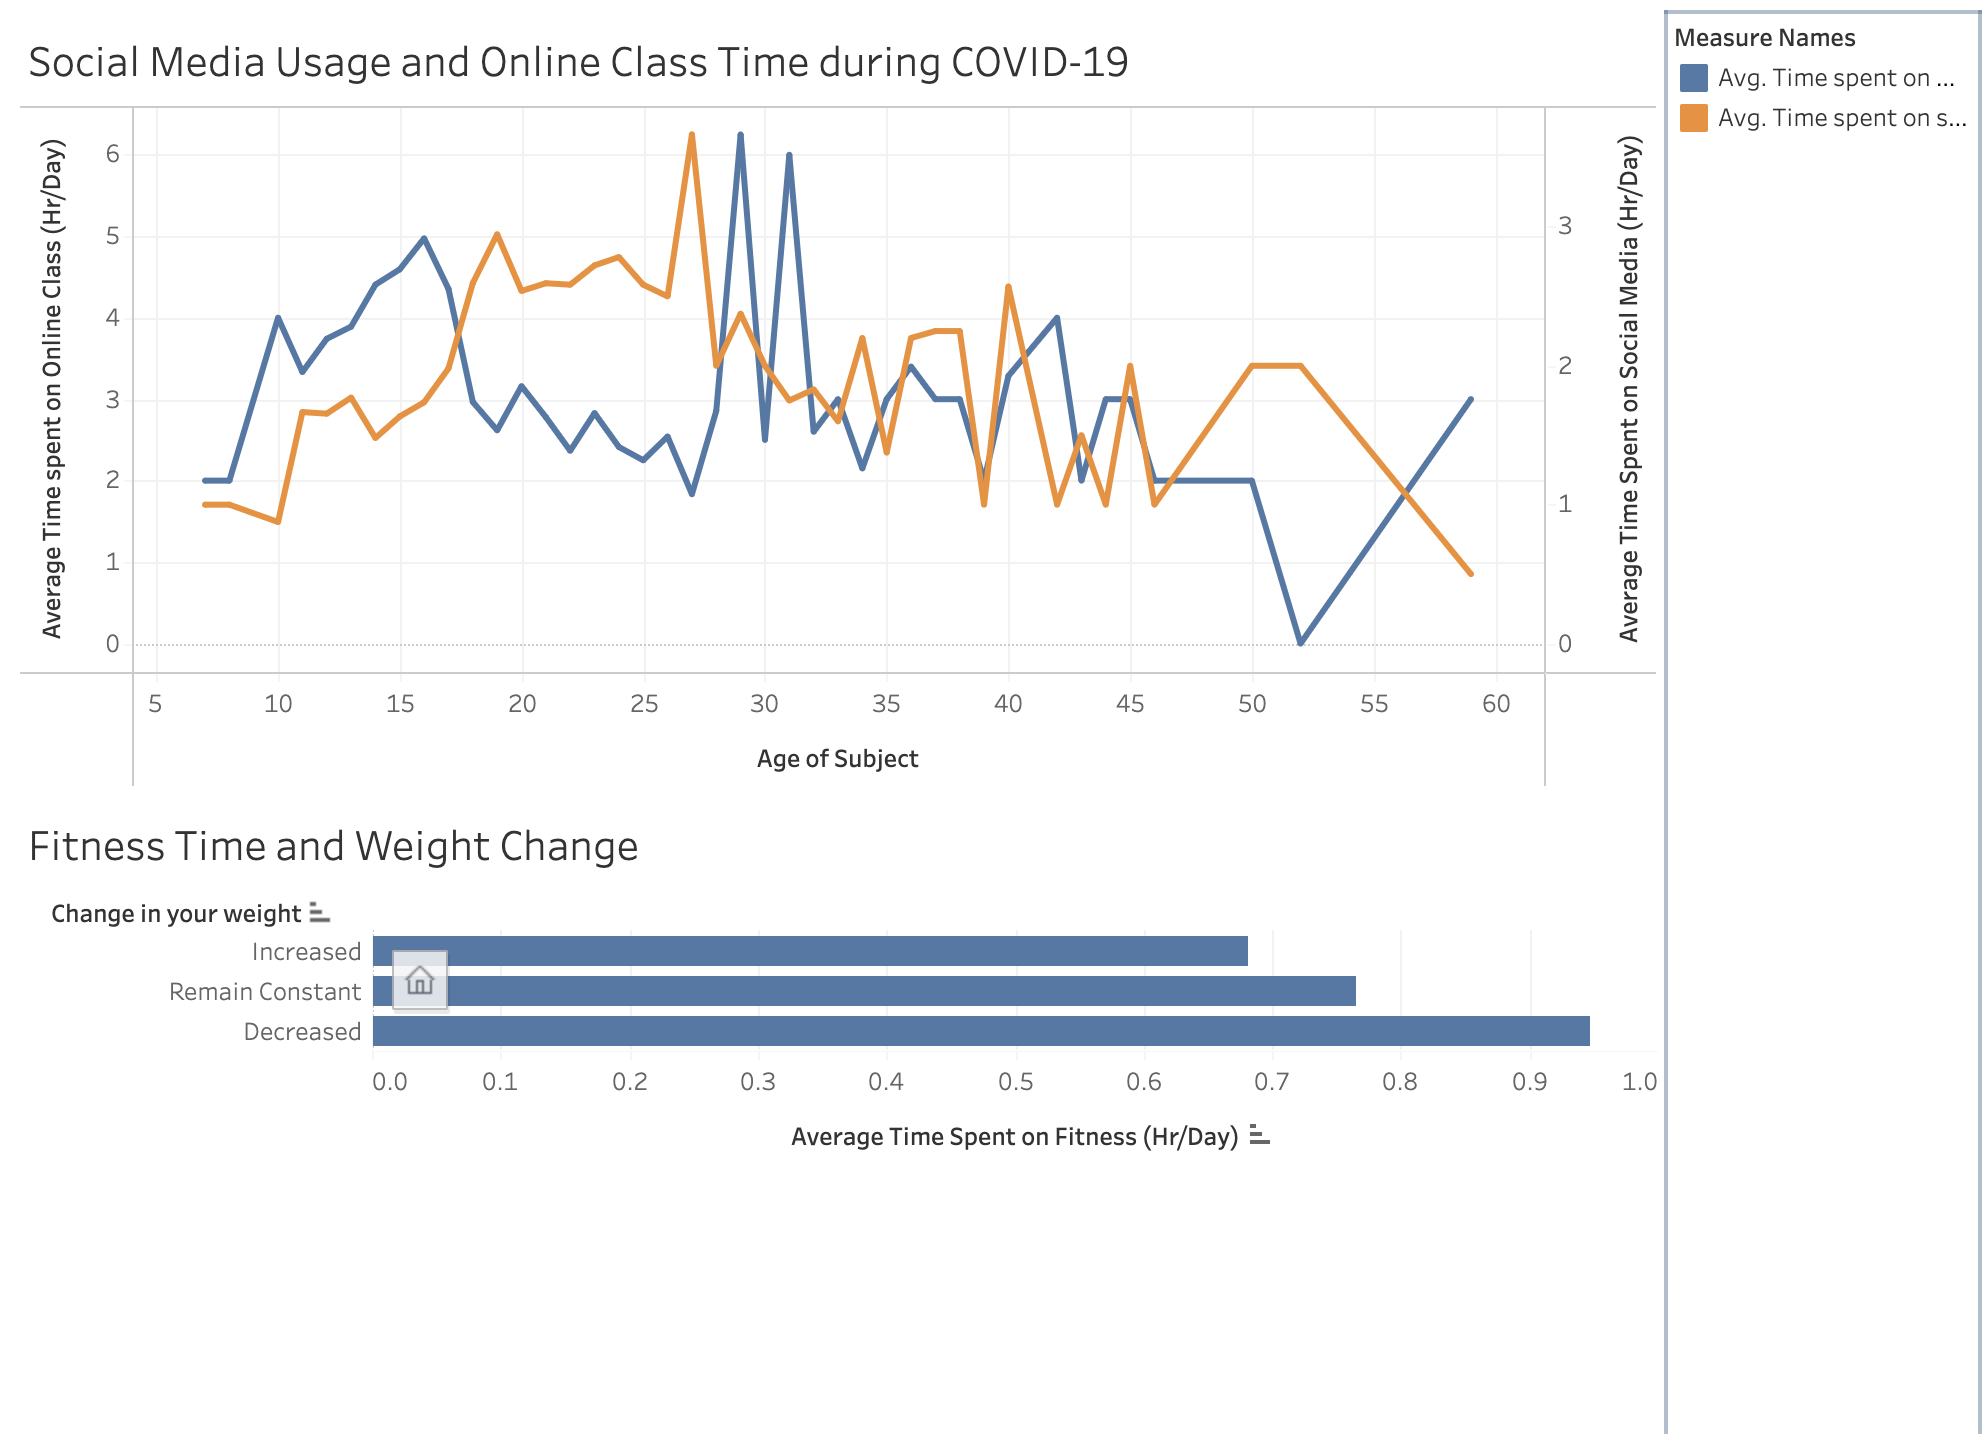

##5. Contrast with an AI Tool

##Objective 1:

Using ChatGPT4 I upaloded the raw dataset and asked it this question: Analyze whether time spent on social media affects time spent on online classes.

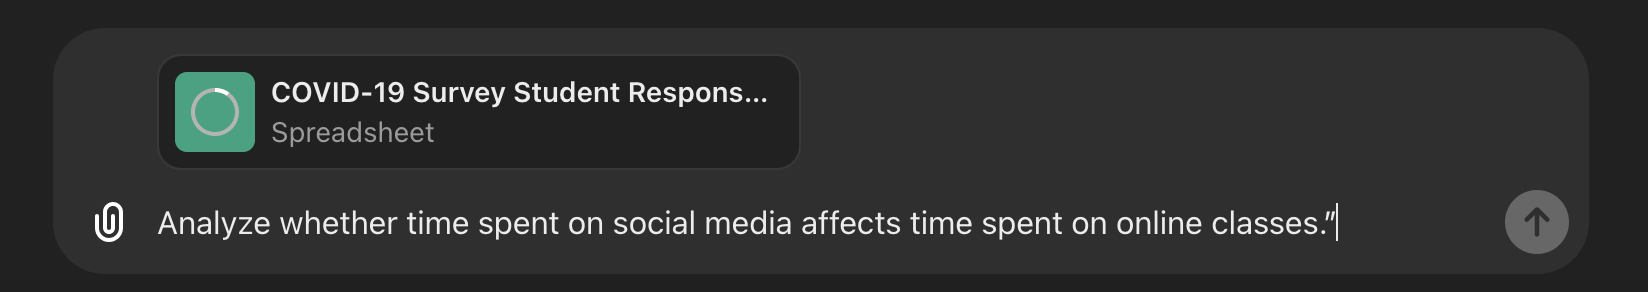

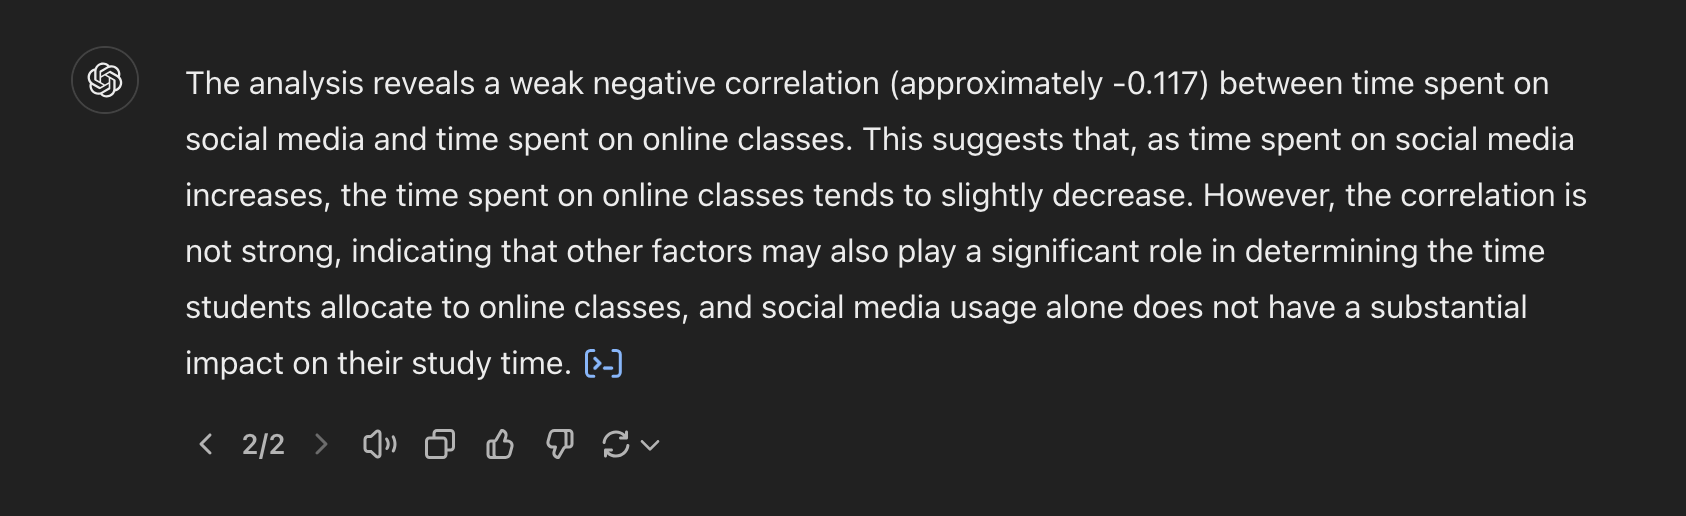

The analysis from ChatGPT identified a weak negative correlation about -0.117 between time spent on social media and time spent on online classes, suggesting that as social media use increases, time in online classes slightly decreases, but the relationship is not strong enough to draw firm conclusions. In contrast, my results from the Mann-Whitney U test revealed a statistically significant difference between high and low social media users in terms of their online class time, with a p-value of 4.447e-05, well below the 0.05 significance level. This indicates that while the overall correlation might be weak, there are meaningful differences between these groups. ChatGPT’s interpretation emphasizes the role of other factors, while my test results highlight that social media usage levels do impact how much time students spend on online classes. Together, these findings suggest that social media is one of several factors influencing study time, but there migh tbe other factors.

##Objective 2:

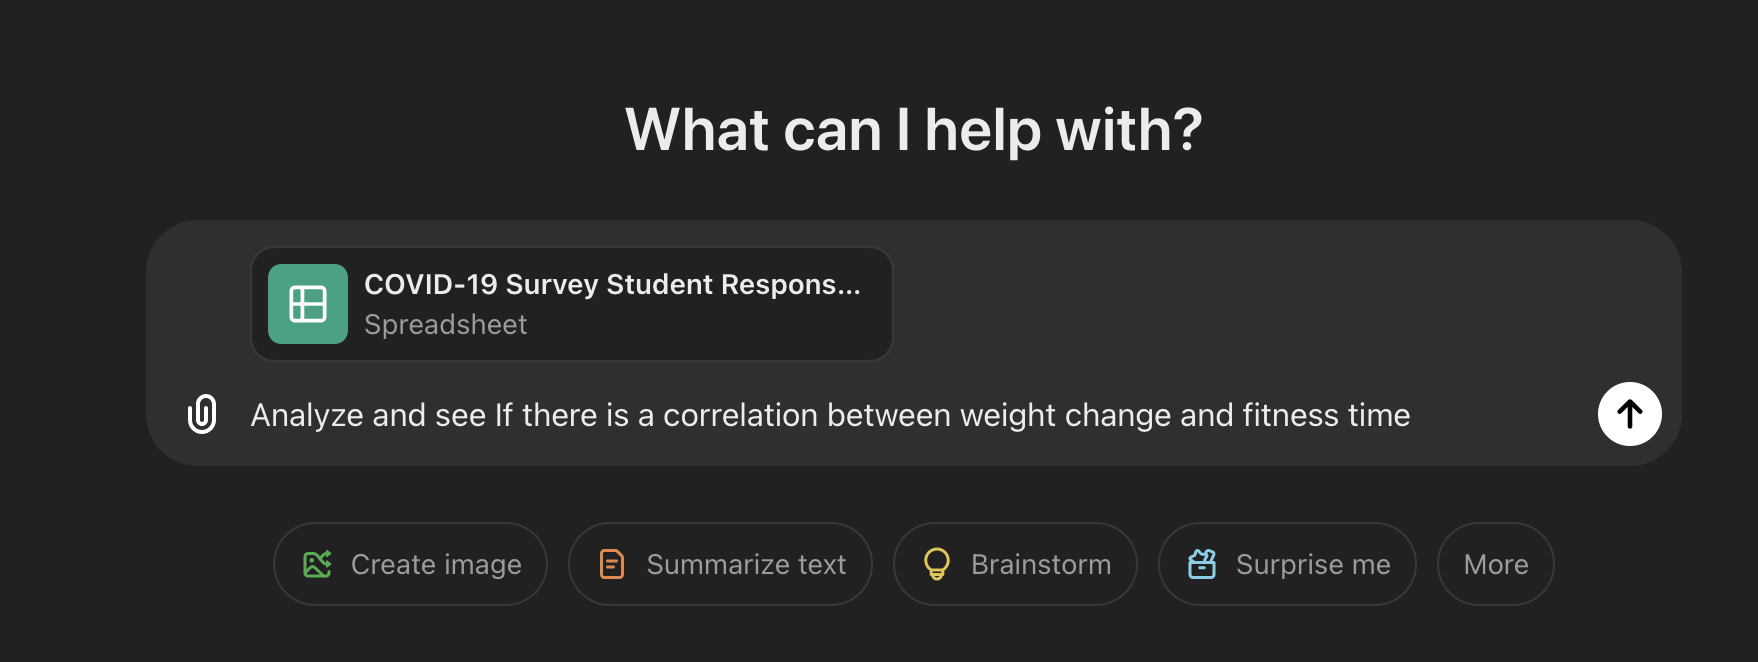

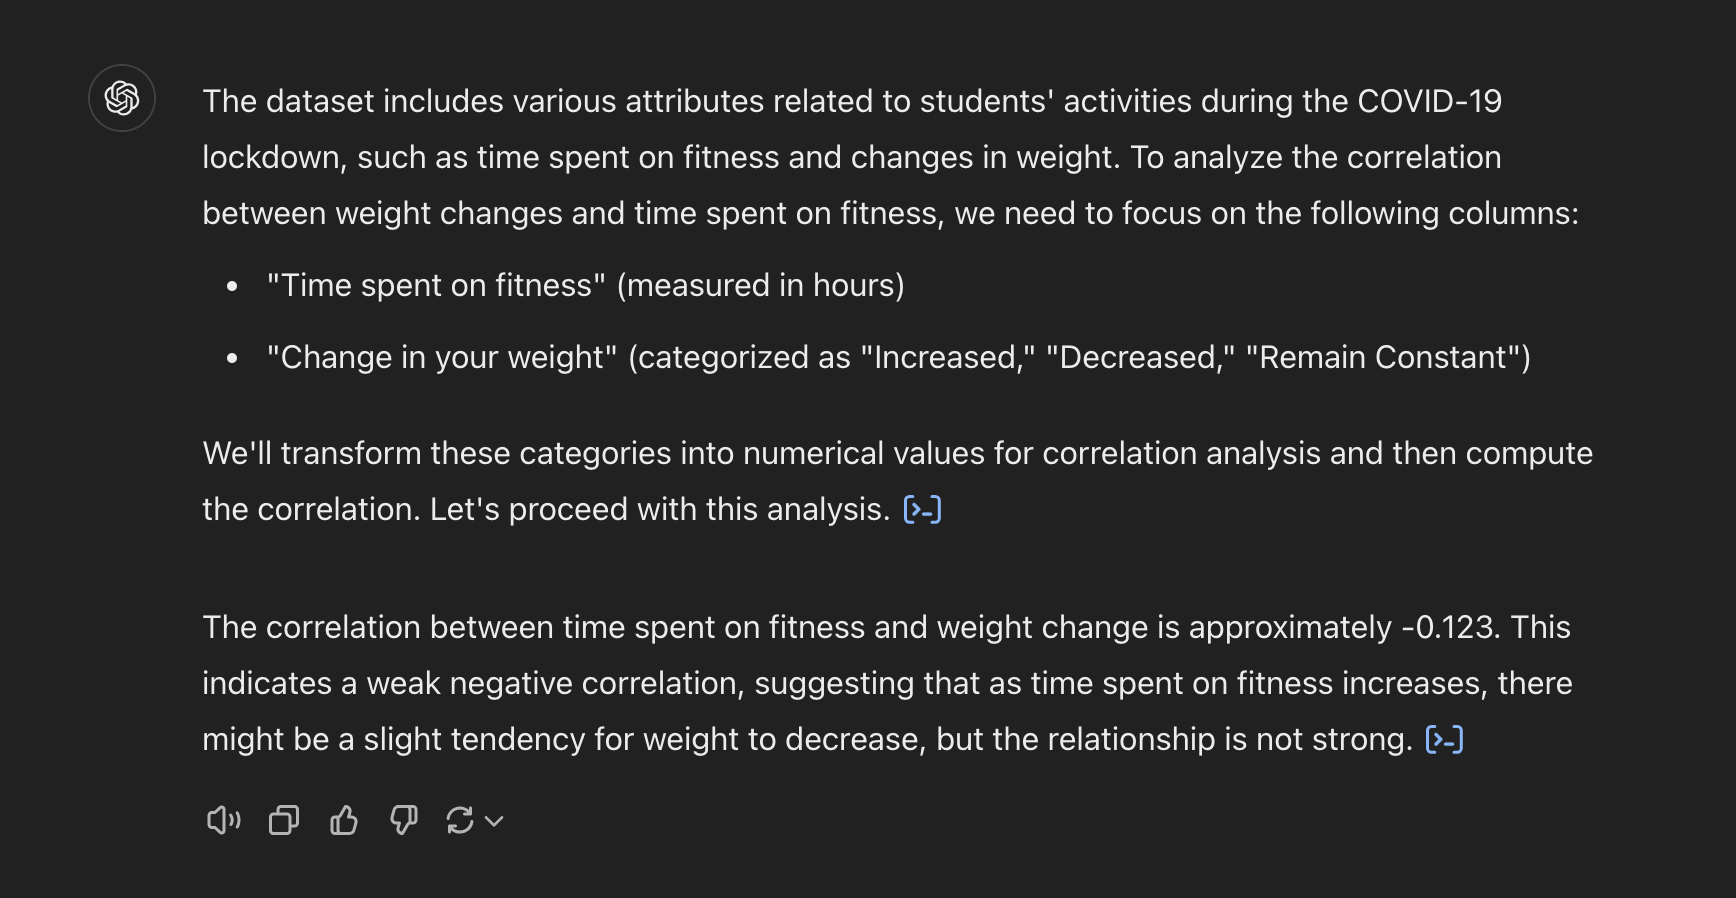

The Mann-Whitney U test indicates that the difference in time spent on fitness between students who experienced weight changes and those whose weight remained constant is not statistically significant. This suggests that any observed differences in fitness time between these groups are likely due to random variation rather than a meaningful relationship. Although ChatGPT's analysis initially highlighted a weak negative correlation, the results from the Mann-Whitney U test imply that time spent on fitness alone is not a determining factor in weight change. Other variables or factors, such as diet or stress levels during the lockdown, may have played a more significant role in influencing weight changes.